1    20381
2    13834
0     9180
Name: Unemployment Rate, dtype: int64

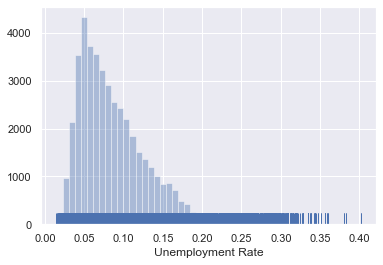

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

data = pd.read_csv("Local_Area_Unemployment_Statistics__LAUS_1.csv", thousands=',', low_memory=False)
data.drop_duplicates(keep = False, inplace = True)
data = data[data["Unemployment Rate"] != "#DIV/0!"]
data = data[data["Labor Force"] > 0]
counts = data["Area Name"].value_counts()
data = data[~data["Area Name"].isin(counts[counts < 120].index)]
data = data[data["Status (Preliminary / Final)"] != "Preliminary"]
data = data.drop(["Date", "Unemployment", "Employment"], axis=1)

dic_month = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7,
            "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
data = data.replace(dic_month)

data["Unemployment Rate"] = data["Unemployment Rate"].astype(float)
a = np.array(data['Unemployment Rate'].values.tolist())

sns.set(color_codes=True)
sns.distplot(data["Unemployment Rate"], kde=False, rug=True);

data_rule = data[:]
data_rule['Unemployment Rate'] = np.where(a > 0.1, 1, 0).tolist()

data['Unemployment Rate'] = np.where(a > 0.1, 2, 
         (np.where(a < 0.05, 0, 1))).tolist()
data["Unemployment Rate"].value_counts()

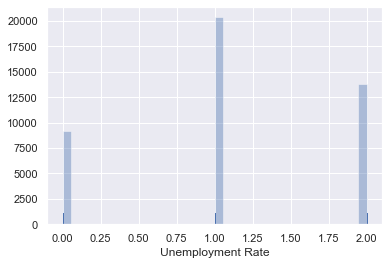

In [4]:
sns.set(color_codes=True)
sns.distplot(data["Unemployment Rate"], kde=False, rug=True);

In [5]:
data.head()

,Area Type,Area Name,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Unemployment Rate
0,State,California,1976,1,Y,Final,9734600,1
1,State,California,1977,1,Y,Final,10132600,1
2,State,California,1978,1,Y,Final,10675100,1
3,State,California,1979,1,Y,Final,11130900,1
4,State,California,1980,1,Y,Final,11479800,1


In [6]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=["Area Name", "Area Type"])
y = data["Unemployment Rate"]
y_rule = data_rule["Unemployment Rate"]
X = data.drop("Unemployment Rate", axis=1)
encoder.fit(X, y)
X_enc = encoder.transform(X)
X_enc = pd.get_dummies(X_enc, columns=["Seasonally Adjusted (Y/N)" ,"Status (Preliminary / Final)"])
X_enc = pd.DataFrame(X_enc)
feature_names = list(X_enc.columns.values)
print(feature_names)
X_enc.head()

['Area Type_0', 'Area Type_1', 'Area Type_2', 'Area Type_3', 'Area Name_0', 'Area Name_1', 'Area Name_2', 'Area Name_3', 'Area Name_4', 'Area Name_5', 'Area Name_6', 'Area Name_7', 'Year', 'Month', 'Labor Force', 'Seasonally Adjusted (Y/N)_N', 'Seasonally Adjusted (Y/N)_Y', 'Status (Preliminary / Final)_Final', 'Status (Preliminary / Final)_Prelim']


,Area Type_0,Area Type_1,Area Type_2,Area Type_3,Area Name_0,Area Name_1,Area Name_2,Area Name_3,Area Name_4,Area Name_5,Area Name_6,Area Name_7,Year,Month,Labor Force,Seasonally Adjusted (Y/N)_N,Seasonally Adjusted (Y/N)_Y,Status (Preliminary / Final)_Final,Status (Preliminary / Final)_Prelim
0,0,0,0,1,0,0,0,0,0,0,0,1,1976,1,9734600,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,1,1977,1,10132600,0,1,1,0
2,0,0,0,1,0,0,0,0,0,0,0,1,1978,1,10675100,0,1,1,0
3,0,0,0,1,0,0,0,0,0,0,0,1,1979,1,11130900,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,1980,1,11479800,0,1,1,0


In [8]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
data_scale = min_max_scaler.fit_transform(X_enc)
X_enc = pd.DataFrame(data_scale)

feature_dict = {}
for i in range(len(feature_names)):
    feature_dict[i] = feature_names[i]
X_enc = X_enc.rename(columns=feature_dict)
X_enc.head()

,Area Type_0,Area Type_1,Area Type_2,Area Type_3,Area Name_0,Area Name_1,Area Name_2,Area Name_3,Area Name_4,Area Name_5,Area Name_6,Area Name_7,Year,Month,Labor Force,Seasonally Adjusted (Y/N)_N,Seasonally Adjusted (Y/N)_Y,Status (Preliminary / Final)_Final,Status (Preliminary / Final)_Prelim
0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.000000,-1.0,-0.006497,-1.0,1.0,1.0,-1.0
1,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.953488,-1.0,0.034123,-1.0,1.0,1.0,-1.0
2,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.906977,-1.0,0.089491,-1.0,1.0,1.0,-1.0
3,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.860465,-1.0,0.136011,-1.0,1.0,1.0,-1.0
4,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.813953,-1.0,0.171620,-1.0,1.0,1.0,-1.0


In [9]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel    
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_enc, y)
print("After we delete three features: Data, Unemployment, Employment, there are: ", X_enc.shape)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_enc)
print("After the first feature selection, features are: ", X_new.shape) # Features: 19
print("-------------------------------------------------------------")

X_sel1 = pd.DataFrame(X_new)
X_sel1.head()


def get_feature_names(X, col):
  try:
    mask = X.get_support() 
  except AttributeError:
    mask = X.support_ 
  new_features = [] 
  for bool, feature in zip(mask, col):
    if bool:
      new_features.append(feature)
  return new_features

print(get_feature_names(model, feature_names))


After we delete three features: Data, Unemployment, Employment, there are:  (43395, 19)
After the first feature selection, features are:  (43395, 19)
-------------------------------------------------------------
['Area Type_0', 'Area Type_1', 'Area Type_2', 'Area Type_3', 'Area Name_0', 'Area Name_1', 'Area Name_2', 'Area Name_3', 'Area Name_4', 'Area Name_5', 'Area Name_6', 'Area Name_7', 'Year', 'Month', 'Labor Force', 'Seasonally Adjusted (Y/N)_N', 'Seasonally Adjusted (Y/N)_Y', 'Status (Preliminary / Final)_Final', 'Status (Preliminary / Final)_Prelim']


In [7]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50)
etc = etc.fit(X_enc, y)
model1 = SelectFromModel(etc, prefit=True)
X_new2 = model1.transform(X_enc)
print("After the second feature selection, features are: ", X_new2.shape) # Features: 3

X_sel2 = pd.DataFrame(X_new2)
X_sel2.head()

print(get_feature_names(model1, feature_names))

After the second feature selection, features are:  (43395, 3)
['Year', 'Month', 'Labor Force']


In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

def sampling(r, X_enc, y, rule):
    if rule == False:
        if r == "over":
            sm = SMOTE(random_state=2)
            X_sample, y_sample = sm.fit_sample(X_enc, y)
        elif r == "under":
            rus = RandomUnderSampler(random_state=2)
            X_sample, y_sample = rus.fit_resample(X_enc, y)
        elif r == "bal":
            sme = SMOTEENN(random_state=42)
            X_sample, y_sample = sme.fit_resample(X_enc, y)
        print("After Sampling, counts of label '2': {}".format(sum(y_sample==2)))
        print("After Sampling, counts of label '1': {}".format(sum(y_sample==1)))
        print("After Sampling, counts of label '0': {}".format(sum(y_sample==0)))
        print("-------------------------------------------------------------")
    elif rule == True:
        if r == "over":
            sm = SMOTE(random_state=2)
            X_sample, y_sample = sm.fit_sample(X_enc, y)
        elif r == "under":
            rus = RandomUnderSampler(random_state=2)
            X_sample, y_sample = rus.fit_resample(X_enc, y)
        elif r == "bal":
            sme = SMOTEENN(random_state=42)
            X_sample, y_sample = sme.fit_resample(X_enc, y)
       
        print("After Sampling, counts of label '1': {}".format(sum(y_sample==1)))
        print("After Sampling, counts of label '0': {}".format(sum(y_sample==0)))
        print("-------------------------------------------------------------")     
    
    return X_sample, y_sample

print("The first feature selection method: ")
X_sel1_over, y_sel1_over = sampling("over", X_sel1, y, False)
X_sel1_und, y_sel1_und = sampling("under", X_sel1, y , False)
X_sel1_bal, y_sel1_bal = sampling("bal", X_sel1, y , False)

X_sel1_over_rule, y_sel1_over_rule = sampling("over", X_sel1, y_rule, True)
X_sel1_und_rule, y_sel1_und_rule = sampling("under", X_sel1, y_rule , True)
X_sel1_bal_rule, y_sel1_bal_rule = sampling("bal", X_sel1, y_rule , True)


print("The second feature selection method: ")
X_sel2_over, y_sel2_over = sampling("over", X_sel2, y, False)
X_sel2_und, y_sel2_und = sampling("under", X_sel2, y , False)
X_sel2_bal, y_sel2_bal = sampling("bal", X_sel2, y , False)

X_sel2_over_rule, y_sel2_over_rule = sampling("over", X_sel2, y_rule, True)
X_sel2_und_rule, y_sel2_und_rule = sampling("under", X_sel2, y_rule , True)
X_sel2_bal_rule, y_sel2_bal_rule = sampling("bal", X_sel2, y_rule , True)

The first feature selection method: 
After OverSampling, counts of label '2': 20381
After OverSampling, counts of label '1': 20381
After OverSampling, counts of label '0': 20381
-------------------------------------------------------------
After OverSampling, counts of label '2': 9180
After OverSampling, counts of label '1': 9180
After OverSampling, counts of label '0': 9180
-------------------------------------------------------------
After OverSampling, counts of label '2': 15567
After OverSampling, counts of label '1': 9315
After OverSampling, counts of label '0': 15527
-------------------------------------------------------------
After OverSampling, counts of label '1': 29561
After OverSampling, counts of label '0': 29561
-------------------------------------------------------------
After OverSampling, counts of label '1': 13834
After OverSampling, counts of label '0': 13834
-------------------------------------------------------------
After OverSampling, counts of label '1': 25208

In [57]:
from sklearn import linear_model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from skrules import SkopeRules
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from prettytable import PrettyTable
import warnings

warnings.filterwarnings('ignore')
def cv_train_test_split(X, y):
    X_Train, Y_Train, X_Test, Y_Test = [], [], [], []
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=10)
    for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            X_Train.append(X_train)
            X_Test.append(X_test)
            Y_Train.append(y_train)
            Y_Test.append(y_test)
    return X_Train, Y_Train, X_Test, Y_Test

feature_train_over1, label_train_over1, feature_test_over1, label_test_over1 = cv_train_test_split(X_sel1_over, y_sel1_over)
feature_train_ru_over1, label_train_ru_over1, feature_test_ru_over1, label_test_ru_over1 = cv_train_test_split(X_sel1_over_rule, y_sel1_over_rule)

feature_train_und1, label_train_und1, feature_test_und1, label_test_und1 = cv_train_test_split(X_sel1_und, y_sel1_und)
feature_train_ru_und1, label_train_ru_und1, feature_test_ru_und1, label_test_ru_und1 = cv_train_test_split(X_sel1_und_rule, y_sel1_und_rule)

feature_train_bal1, label_train_bal1, feature_test_bal1, label_test_bal1 = cv_train_test_split(X_sel1_bal, y_sel1_bal)
feature_train_ru_bal1, label_train_ru_bal1, feature_test_ru_bal1, label_test_ru_bal1 = cv_train_test_split(X_sel1_bal_rule, y_sel1_bal_rule)

feature_train_over2, label_train_over2, feature_test_over2, label_test_over2 = cv_train_test_split(X_sel2_over, y_sel2_over)
feature_train_ru_over2, label_train_ru_over2, feature_test_ru_over2, label_test_ru_over2 = cv_train_test_split(X_sel2_over_rule, y_sel2_over_rule)

feature_train_und2, label_train_und2, feature_test_und2, label_test_und2 = cv_train_test_split(X_sel2_und, y_sel2_und)
feature_train_ru_und2, label_train_ru_und2, feature_test_ru_und2, label_test_ru_und2 = cv_train_test_split(X_sel2_und_rule, y_sel2_und_rule)

feature_train_bal2, label_train_bal2, feature_test_bal2, label_test_bal2 = cv_train_test_split(X_sel2_bal, y_sel2_bal)
feature_train_ru_bal2, label_train_ru_bal2, feature_test_ru_bal2, label_test_ru_bal2 = cv_train_test_split(X_sel2_bal_rule, y_sel2_bal_rule)


def model(m, feature_train, label_train, feature_test, label_test, X, y):
    if m == "linear":
        warnings.filterwarnings('ignore')
        lin_cla  = linear_model.SGDClassifier(loss='modified_huber')
        print(reset + "Linear-based Model:")
        printScore(lin_cla, feature_train, label_train, feature_test, label_test)
        cla_wrong(lin_cla, X, y)
    if m == "linear1":
        warnings.filterwarnings('ignore')
        lin_cla1  = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr'))
        print(reset + "Linear-based Model 2:")
        printScore(lin_cla1, feature_train, label_train, feature_test, label_test)
        cla_wrong(lin_cla1, X, y)
    elif m == "tree":
        tree_cla = tree.DecisionTreeClassifier(criterion = "entropy")
        print(reset + "Tree-based Model:")
        printScore(tree_cla, feature_train, label_train, feature_test, label_test)
        cla_wrong(tree_cla, X, y)
    elif m == "bagging": 
        bagging_cla = BaggingClassifier()
        print(reset + "Bagging-based Model:")
        printScore(bagging_cla, feature_train, label_train, feature_test, label_test)
        cla_wrong(bagging_cla, X, y)
    elif m == "boosting":
        boosting_cla = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=100, random_state=0)
        print(reset + "Boosting-based Model:")
        printScore(boosting_cla, feature_train, label_train, feature_test, label_test)
        cla_wrong(boosting_cla, X, y)
    elif m == "neighbors":
        neigh_cla = KNeighborsClassifier(n_neighbors=5, p=5)
        print(reset + "Distance-based Model: ")
        printScore(neigh_cla, feature_train, label_train, feature_test, label_test)
        cla_wrong(neigh_cla, X, y)
    elif m == "bayes":
        nb_cla = GaussianNB() 
        print(reset + "Naive Bayes Model: ")
        printScore(nb_cla, feature_train, label_train, feature_test, label_test)
        cla_wrong(nb_cla, X, y)
    elif m == "rule":
        warnings.filterwarnings('ignore')
        rb_cla = SkopeRules(max_depth_duplication=3,
                 n_estimators=30,
                 precision_min=0.6,
                 recall_min=0.01)
        print(reset + "Rule-based Model: lables are only high unemployment rate(1) and not high unemployment rate(0)")
        printScore_rule(rb_cla, feature_train, label_train, feature_test, label_test)
        
def printScore(model, feature_train, label_train, feature_test, label_test):
        t = PrettyTable(['id', 'accuracy', 'pre[h]', 'rec[h]', 'f1[h]', 'pre[m]', 'rec[m]', 'f1[m]',
                        'pre[l]', 'rec[l]', 'f1[l]', 'f[avg_macro]'])
        sum_acc, sum_pre, sum_rec, sum_f, sum_pre2, sum_rec2, sum_f2, sum_pre1, sum_rec1, sum_f1, sum_f_total = 0,0,0,0,0,0,0,0,0,0,0
        for i in range(10):
            model.fit(feature_train[i], label_train[i])
            y_pred = model.predict(feature_test[i])
            acc = accuracy_score(label_test[i], y_pred)
            pre = precision_score(label_test[i], y_pred, average = None, labels = [2])
            rec = recall_score(label_test[i], y_pred, average = None, labels = [2])
            f_score = f1_score(label_test[i], y_pred, average = None, labels = [2])
            pre2 = precision_score(label_test[i], y_pred, average = None, labels = [1])
            rec2 = recall_score(label_test[i], y_pred, average = None, labels = [1])
            f_score2 = f1_score(label_test[i], y_pred, average = None, labels = [1])
            pre1 = precision_score(label_test[i], y_pred, average = None, labels = [0])
            rec1 = recall_score(label_test[i], y_pred, average = None, labels = [0])
            f_score1 = f1_score(label_test[i], y_pred, average = None, labels = [0])
            f_score_total = f1_score(label_test[i], y_pred, average = "macro")
            t.add_row([i+1, '{0:.3f}'.format(float(acc)), '{0:.3f}'.format(float(pre)), '{0:.3f}'.format(float(rec)),
                      '{0:.3f}'.format(float(f_score)), '{0:.3f}'.format(float(pre2)), '{0:.3f}'.format(float(rec2)),
                      '{0:.3f}'.format(float(f_score2)),
                      '{0:.3f}'.format(float(pre1)), '{0:.3f}'.format(float(rec1)),
                      '{0:.3f}'.format(float(f_score1)),'{0:.3f}'.format(float(f_score_total))])
            sum_acc += float(acc)
            sum_pre += float(pre)
            sum_rec += float(rec)
            sum_f += float(f_score)
            sum_pre2 += float(pre2)
            sum_rec2 += float(rec2)
            sum_f2 += float(f_score2)
            sum_pre1 += float(pre1)
            sum_rec1 += float(rec1)
            sum_f1 += float(f_score1)
            sum_f_total += float(f_score_total)
        avg_acc = sum_acc/10
        avg_pre = sum_pre/10
        avg_rec = sum_rec/10
        avg_f = sum_f/10
        avg_pre2 = sum_pre2/10
        avg_rec2 = sum_rec2/10
        avg_f2 = sum_f2/10
        avg_pre1 = sum_pre1/10
        avg_rec1 = sum_rec1/10
        avg_f1 = sum_f1/10
        avg_f_total = sum_f_total/10
        t.add_row([" Average ", '{0:.3f}'.format(avg_acc), '{0:.3f}'.format(avg_pre), '{0:.3f}'.format(avg_rec),
                  '{0:.3f}'.format(avg_f),'{0:.3f}'.format(avg_pre2), '{0:.3f}'.format(avg_rec2),
                  '{0:.3f}'.format(avg_f2), '{0:.3f}'.format(avg_pre1), '{0:.3f}'.format(avg_rec1),
                  '{0:.3f}'.format(avg_f1), '{0:.3f}'.format(avg_f_total)])
        print(t)
        

def printScore_rule(model, feature_train, label_train, feature_test, label_test):
        t = PrettyTable(['id', 'accuracy', 'precision', 'recall', 'f1 score'])
        sum_acc, sum_pre, sum_rec, sum_f= 0,0,0,0
        for i in range(10):
            model.fit(feature_train[i], label_train[i])
            y_pred = model.predict(feature_test[i])
            acc = accuracy_score(label_test[i], y_pred)
            pre = precision_score(label_test[i], y_pred, average = 'binary')
            rec = recall_score(label_test[i], y_pred, average = 'binary')
            f_score = f1_score(label_test[i], y_pred, average = 'binary')
            t.add_row([i+1, '{0:.3f}'.format(acc), '{0:.3f}'.format(pre), '{0:.3f}'.format(rec),
                      '{0:.3f}'.format(f_score)])
            sum_acc += float(acc)
            sum_pre += float(pre)
            sum_rec += float(rec)
            sum_f += float(f_score)
        avg_acc = sum_acc/10
        avg_pre = sum_pre/10
        avg_rec = sum_rec/10
        avg_f = sum_f/10
        t.add_row([" Average ", '{0:.3f}'.format(avg_acc), '{0:.3f}'.format(avg_pre), '{0:.3f}'.format(avg_rec),
                  '{0:.3f}'.format(avg_f)])
        print(t)



def print_result(sampling, train_f, train_l, test_f, test_l, x,y):
    print(bold+sampling)
    model("linear", train_f,train_l,test_f,test_l,x,y)
    model("linear1", train_f,train_l,test_f,test_l,x,y)
    model("tree", train_f,train_l,test_f,test_l,x,y)
    model("bagging", train_f,train_l,test_f,test_l,x,y)
    model("boosting", train_f,train_l,test_f,test_l,x,y)
    model("neighbors",train_f,train_l,test_f,test_l,x,y)
    model("bayes",train_f,train_l,test_f,test_l,x,y)
    
def print_result_rule(train_f, train_l, test_f, test_l, x,y):
    model("rule", train_f, train_l, test_f, test_l, x, y) 

        
bold = "\033[1m" 
reset = "\033[0;0m"
string = "The first feature selection method"
new_string = string.center(110)
print(bold+new_string)
print_result("After Under Sampling", feature_train_und1, label_train_und1, feature_test_und1, label_test_und1, X_sel1_und, y_sel1_und)        
print_result_rule(feature_train_ru_und1, label_train_ru_und1, feature_test_ru_und1, label_test_ru_und1, X_sel1_und_rule, y_sel1_und_rule) 

print_result("After Over Sampling", feature_train_over1, label_train_over1, feature_test_over1, label_test_over1, X_sel1_over, y_sel1_over)        
print_result_rule(feature_train_ru_over1, label_train_ru_over1, feature_test_ru_over1, label_test_ru_over1, X_sel1_over_rule, y_sel1_over_rule)   

print_result("After Balanced Sampling", feature_train_bal1, label_train_bal1, feature_test_bal1, label_test_bal1, X_sel1_bal, y_sel1_bal)        
print_result_rule(feature_train_ru_bal1, label_train_ru_bal1, feature_test_ru_bal1, label_test_ru_bal1, X_sel1_bal_rule, y_sel1_bal_rule)   


string2 = "The second feature selection method"
new_string2 = string2.center(110)
print(bold+new_string2)
print_result("After Under Sampling", feature_train_und2, label_train_und2, feature_test_und2, label_test_und2, X_sel2_und, y_sel2_und)        
print_result_rule(feature_train_ru_und2, label_train_ru_und2, feature_test_ru_und2, label_test_ru_und2, X_sel2_und_rule, y_sel2_und_rule) 

print_result("After Over Sampling", feature_train_over2, label_train_over2, feature_test_over2, label_test_over2, X_sel2_over, y_sel2_over)        
print_result_rule(feature_train_ru_over2, label_train_ru_over2, feature_test_ru_over2, label_test_ru_over2, X_sel2_over_rule, y_sel2_over_rule)   

print_result("After Balanced Sampling", feature_train_bal2, label_train_bal2, feature_test_bal2, label_test_bal2, X_sel2_bal, y_sel2_bal)        
print_result_rule(feature_train_ru_bal2, label_train_ru_bal2, feature_test_ru_bal2, label_test_ru_bal2, X_sel2_bal_rule, y_sel2_bal_rule)   



                                      The first feature selection method                                      
After Under Sampling
Linear-based Model:
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.426   | 0.395  | 0.688  | 0.502 | 0.508  | 0.137  | 0.216 | 0.458  | 0.452  | 0.455 |    0.391     |
|     2     |  0.379   | 0.403  | 0.453  | 0.427 | 0.361  | 0.434  | 0.394 | 0.372  | 0.251  | 0.299 |    0.373     |
|     3     |  0.423   | 0.444  | 0.386  | 0.413 | 0.477  | 0.123  | 0.196 | 0.406  | 0.760  | 0.529 |    0.379     |
|     4     |  0.441   | 0.517  | 0.467  | 0.491 | 0.341  | 0.271  | 0.302 | 0.450  | 0.585  | 0.509 |    0.434     |
|     5     |  0.402  

+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.723   | 0.869  | 0.897  | 0.883 | 0.584  | 0.633  | 0.607 | 0.722  | 0.638  | 0.677 |    0.722     |
|     2     |  0.782   | 0.866  | 0.902  | 0.884 | 0.702  | 0.633  | 0.666 | 0.768  | 0.812  | 0.789 |    0.779     |
|     3     |  0.761   | 0.857  | 0.870  | 0.864 | 0.639  | 0.672  | 0.655 | 0.794  | 0.741  | 0.767 |    0.762     |
|     4     |  0.710   | 0.856  | 0.894  | 0.875 | 0.562  | 0.633  | 0.596 | 0.727  | 0.603  | 0.660 |    0.710     |
|     5     |  0.761   | 0.863  | 0.877  | 0.870 | 0.656  | 0.631  | 0.643 | 0.759  | 0.776  | 0.767 |    0.760     |
|     6     |  0.680   | 0.817  | 0.898  | 0.856 | 0.534

+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.864   | 0.915  | 0.862  | 0.887 | 0.796  | 0.805  | 0.800 | 0.884  | 0.925  | 0.904 |    0.864     |
|     2     |  0.818   | 0.917  | 0.801  | 0.855 | 0.713  | 0.768  | 0.740 | 0.844  | 0.886  | 0.864 |    0.820     |
|     3     |  0.867   | 0.889  | 0.939  | 0.913 | 0.809  | 0.797  | 0.803 | 0.903  | 0.866  | 0.884 |    0.867     |
|     4     |  0.822   | 0.826  | 0.832  | 0.829 | 0.747  | 0.716  | 0.731 | 0.887  | 0.918  | 0.902 |    0.821     |
|     5     |  0.831   | 0.833  | 0.800  | 0.816 | 0.758  | 0.728  | 0.743 | 0.894  | 0.964  | 0.928 |    0.829     |
|     6     |  0.820   | 0.819  | 0.953  | 0.881 | 0.875

+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.533   | 0.509  | 0.750  | 0.607 | 0.765  | 0.114  | 0.198 | 0.548  | 0.562  | 0.555 |    0.453     |
|     2     |  0.534   | 0.517  | 0.662  | 0.581 | 0.696  | 0.105  | 0.183 | 0.540  | 0.657  | 0.593 |    0.452     |
|     3     |  0.557   | 0.536  | 0.692  | 0.604 | 0.767  | 0.123  | 0.212 | 0.563  | 0.676  | 0.614 |    0.477     |
|     4     |  0.534   | 0.522  | 0.610  | 0.563 | 0.781  | 0.090  | 0.161 | 0.532  | 0.719  | 0.611 |    0.445     |
|     5     |  0.560   | 0.526  | 0.759  | 0.621 | 0.671  | 0.060  | 0.111 | 0.599  | 0.653  | 0.625 |    0.452     |
|     6     |  0.557   | 0.529  | 0.741  | 0.618 | 0.759

Naive Bayes Model: 
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.404   | 0.395  | 0.997  | 0.566 | 0.802  | 0.076  | 0.138 | 0.000  | 0.000  | 0.000 |    0.235     |
|     2     |  0.403   | 0.395  | 0.995  | 0.566 | 0.720  | 0.074  | 0.133 | 0.000  | 0.000  | 0.000 |    0.233     |
|     3     |  0.404   | 0.395  | 0.992  | 0.565 | 0.673  | 0.072  | 0.131 | 1.000  | 0.007  | 0.014 |    0.237     |
|     4     |  0.396   | 0.394  | 0.989  | 0.564 | 0.459  | 0.055  | 0.098 | 0.000  | 0.000  | 0.000 |    0.221     |
|     5     |  0.396   | 0.393  | 0.997  | 0.564 | 0.522  | 0.038  | 0.072 | 1.000  | 0.001  | 0.001 |    0.212     |
|     6     |  0.402   | 0.396  | 0.

+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.830   | 0.856  | 0.870  | 0.863 | 0.755  | 0.796  | 0.775 | 0.886  | 0.824  | 0.854 |    0.831     |
|     2     |  0.833   | 0.869  | 0.879  | 0.874 | 0.762  | 0.791  | 0.776 | 0.874  | 0.830  | 0.851 |    0.834     |
|     3     |  0.827   | 0.862  | 0.879  | 0.871 | 0.740  | 0.792  | 0.765 | 0.889  | 0.809  | 0.847 |    0.828     |
|     4     |  0.818   | 0.873  | 0.863  | 0.868 | 0.725  | 0.803  | 0.762 | 0.872  | 0.789  | 0.828 |    0.819     |
|     5     |  0.826   | 0.876  | 0.873  | 0.874 | 0.735  | 0.813  | 0.772 | 0.884  | 0.794  | 0.836 |    0.828     |
|     6     |  0.811   | 0.893  | 0.862  | 0.877 | 0.698

+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.404   | 0.380  | 0.692  | 0.491 | 0.571  | 0.130  | 0.212 | 0.408  | 0.389  | 0.398 |    0.367     |
|     2     |  0.378   | 0.359  | 0.564  | 0.439 | 0.562  | 0.146  | 0.231 | 0.363  | 0.425  | 0.391 |    0.354     |
|     3     |  0.320   | 0.417  | 0.436  | 0.426 | 0.246  | 0.137  | 0.176 | 0.276  | 0.386  | 0.322 |    0.308     |
|     4     |  0.347   | 0.329  | 0.517  | 0.402 | 0.385  | 0.125  | 0.188 | 0.362  | 0.399  | 0.380 |    0.323     |
|     5     |  0.256   | 0.271  | 0.316  | 0.292 | 0.096  | 0.067  | 0.079 | 0.339  | 0.385  | 0.360 |    0.244     |
|     6     |  0.345   | 0.356  | 0.488  | 0.412 | 0.313

Naive Bayes Model: 
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.446   | 0.397  | 0.913  | 0.553 | 0.620  | 0.128  | 0.212 | 0.603  | 0.298  | 0.399 |    0.388     |
|     2     |  0.422   | 0.391  | 0.832  | 0.532 | 0.646  | 0.125  | 0.210 | 0.457  | 0.309  | 0.368 |    0.370     |
|     3     |  0.417   | 0.399  | 0.780  | 0.528 | 0.546  | 0.099  | 0.168 | 0.429  | 0.371  | 0.398 |    0.365     |
|     4     |  0.393   | 0.351  | 0.784  | 0.485 | 0.547  | 0.098  | 0.166 | 0.506  | 0.297  | 0.374 |    0.341     |
|     5     |  0.372   | 0.333  | 0.672  | 0.445 | 0.510  | 0.089  | 0.152 | 0.439  | 0.354  | 0.392 |    0.330     |
|     6     |  0.400   | 0.385  | 0.

+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     id    | accuracy | pre[h] | rec[h] | f1[h] | pre[m] | rec[m] | f1[m] | pre[l] | rec[l] | f1[l] | f[avg_macro] |
+-----------+----------+--------+--------+-------+--------+--------+-------+--------+--------+-------+--------------+
|     1     |  0.973   | 0.986  | 0.986  | 0.986 | 0.965  | 0.911  | 0.938 | 0.967  | 0.994  | 0.980 |    0.968     |
|     2     |  0.980   | 0.992  | 0.982  | 0.987 | 0.965  | 0.944  | 0.954 | 0.976  | 0.996  | 0.986 |    0.976     |
|     3     |  0.976   | 0.974  | 0.983  | 0.978 | 0.967  | 0.925  | 0.946 | 0.982  | 0.996  | 0.989 |    0.971     |
|     4     |  0.978   | 0.971  | 0.984  | 0.977 | 0.971  | 0.928  | 0.949 | 0.987  | 0.998  | 0.992 |    0.973     |
|     5     |  0.954   | 0.932  | 0.986  | 0.959 | 0.962  | 0.822  | 0.887 | 0.970  | 0.992  | 0.981 |    0.942     |
|     6     |  0.944   | 0.975  | 0.986  | 0.980 | 0.958